# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a dataframe as its first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
        

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.542557    0.952065    1.575347    2.036916    2.735371    2.308125  ...   53.917695   35.004523   39.113731   34.729441   45.561478   44.031799   56.954535
                        W/m^2 Radiative Forcing                      0.0    0.445594    1.024720    1.995873    1.751023    2.016436    2.260563  ...   38.862208   53.843645   31.656632   58.245139   48.116608   61.576018   41.190099
                        K     Surface Temperature                    0.0    0.369130    1.079521    1.972530    1.721791    3.185298    2.303997  ...   45.447873   50.529181   25.939024   43.885750   37.271228   62.164975   67.574674

[3 rows x 101 columns]

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.528687    0.848810    1.526194    1.820665    2.643513    2.247582  ...   54.700040   31.262767   45.352223   24.254535   37.215776   40.813446   63.073865
                        W/m^2 Radiative Forcing                      0.0    0.277665    0.971027    1.893333    1.890566    1.832328    0.942248  ...   29.406643   48.285675   23.889656   60.037471   50.538159   71.125369   32.786983
                        K     Surface Temperature                    0.0    0.310375    1.119161    2.082584    1.421504    3.381304    1.980642  ...   43.324187   45.821282   17.325676   42.122277   41.350964   60.759033   79.718544

[3 rows x 101 columns]

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2        -0.0   -0.542557   -0.952065   -1.575347   -2.036916   -2.735371   -2.308125  ...  -53.917695  -35.004523  -39.113731  -34.729441  -45.561478  -44.031799  -56.954535
                        W/m^2 Radiative Forcing                     -0.0   -0.445594   -1.024720   -1.995873   -1.751023   -2.016436   -2.260563  ...  -38.862208  -53.843645  -31.656632  -58.245139  -48.116608  -61.576018  -41.190099
                        K     Surface Temperature                   -0.0   -0.369130   -1.079521   -1.972530   -1.721791   -3.185298   -2.303997  ...  -45.447873  -50.529181  -25.939024  -43.885750  -37.271228  -62.164975  -67.574674

[3 rows x 101 columns]

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    ppm    Atmospheric Concentrations|CO2   -26.116936
                 1       ssp119    ppm    Atmospheric Concentrations|CO2   -24.470532
                 2       ssp119    ppm    Atmospheric Concentrations|CO2   -26.383755
                 3       ssp119    ppm    Atmospheric Concentrations|CO2   -22.314500
                 4       ssp119    ppm    Atmospheric Concentrations|CO2   -26.537356
                 5       ssp119    ppm    Atmospheric Concentrations|CO2   -27.277124
                 6       ssp119    ppm    Atmospheric Concentrations|CO2   -26.151919
                 7       ssp119    ppm    Atmospheric Concentrations|CO2   -22.501346
                 8       ssp119    ppm    Atmospheric Concentrations|CO2   -22.316696
                 9       ssp119    ppm    Atmospheric Concentrations|CO2   -23.736891
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.215607    0.343869    0.308784    1.058623    1.762027    0.736098  ...   38.217983   14.908704   10.498176    8.817179    7.207520   21.916046   39.065825
                        W/m^2 Radiative Forcing                      0.0    0.133591    0.283712    1.321580    0.873623    0.575159    0.283159  ...   17.045480   43.167239    4.711426   27.624104   15.441085   30.566279   11.267357
                        K     Surface Temperature                    0.0    0.107624    0.395987    1.197159    0.431573    2.205245    1.529012  ...   20.698133   25.368622    2.502768   15.558194    8.276195   47.961964   40.228975

[3 rows x 101 columns]

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                       quantile                                                                                      ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05             0.0    0.078159    0.037195    0.122192    0.441147    1.054536    0.235776  ...   26.615669    5.136814    4.402417    3.499907    4.027756   14.815083   19.523525
                        W/m^2 Radiative Forcing              0.05             0.0    0.041929    0.133808    1.045120    0.218542    0.254864    0.133906  ...   14.771024   24.799030    3.569954   20.429180    5.479693   18.872533    9.799176
                        K     Surface Temperature            0.05             0.0    0.040138    0.355771    0.834416    0.154699    1.982608    0.950661  ...    6.637879   14.437265    1.757417    5.617757    7.086448   25.318091   19.669514
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0    0.215607    0.343869    0.308784    1.058623    1.762027    0.736098  ...   38.217983   14.908704   10.498176    8.817179    7.207520   21.916046   39.065825
                        W/m^2 Radiative Forcing              0.17             0.0    0.133591    0.283712    1.321580    0.873623    0.575159    0.283159  ...   17.045480   43.167239    4.711426   27.624104   15.441085   30.566279   11.267357
                        K     Surface Temperature            0.17             0.0    0.107624    0.395987    1.197159    0.431573    2.205245    1.529012  ...   20.698133   25.368622    2.502768   15.558194    8.276195   47.961964   40.228975
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0    0.528687    0.848810    1.526194    1.820665    2.643513    2.247582  ...   54.700040   31.262767   45.352223   24.254535   37.215776   40.813446   63.073865
                        W/m^2 Radiative Forcing              0.5              0.0    0.277665    0.971027    1.893333    1.890566    1.832328    0.942248  ...   29.406643   48.285675   23.889656   60.037471   50.538159   71.125369   32.786983
                        K     Surface Temperature            0.5              0.0    0.310375    1.119161    2.082584    1.421504    3.381304    1.980642  ...   43.324187   45.821282   17.325676   42.122277   41.350964   60.759033   79.718544
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0    0.902485    1.650347    2.773472    3.239404    3.692397    3.856943  ...   67.854979   49.579627   61.871667   66.598308   86.886365   67.111928   68.453394
                        W/m^2 Radiative Forcing              0.83             0.0    0.857089    1.762220    2.848103    2.603896    3.597952    5.017504  ...   62.338932   73.504161   63.812338   94.232779   82.383777   83.711302   75.595568
                        K     Surface Temperature            0.83             0.0    0.661020    1.586141    2.622193    3.572581    4.040234    3.562281  ...   70.822871   82.322010   51.870492   73.767186   52.280485   86.739294   91.647509
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0    0.976466    1.769403    2.926992    3.680508    4.410558    4.215941  ...   84.821803   78.703151   64.838015   73.640207   95.543674   82.292622   85.900582
                        W/m^2 Radiative Forcing              0.95             0.0    0.951366    1.896010    2.943160    3.024671    3.837095    5.264187  ...   73.063870   80.778952   67.163919   94.957470   85.649483   89.458888   90.834710
                        K     Surface Temperature            0.95             0.0    0.816953    1.835173    2.7

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7fd31c3742e0>])

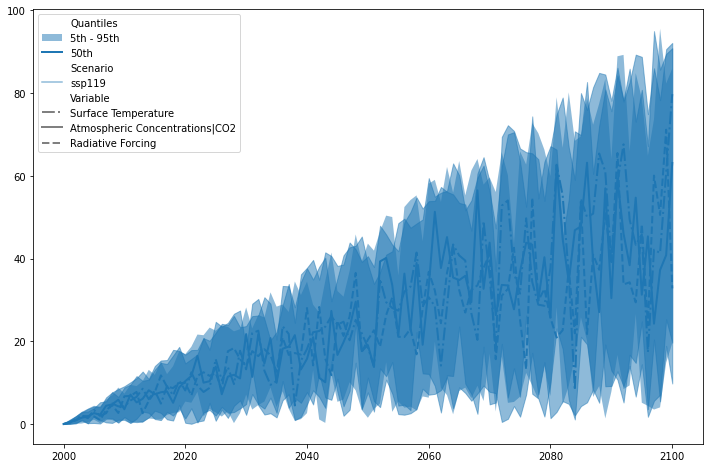

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7fd31c2ab130>])

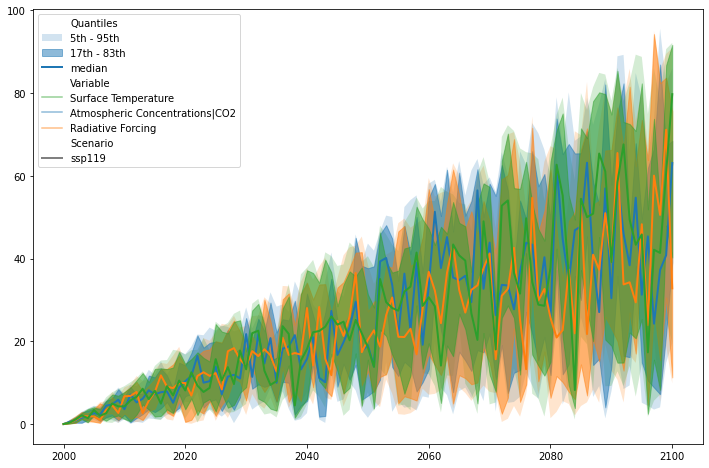

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119      K             Surface Temperature
	3   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119      K             Surface Temperature
	6   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119      K             Surface Temperature
	9   example     0.83  World   ssp119    ppm  Atmospheric Concentrations|CO2
	10  example     0.83  World   ssp11

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7fd31c244190>])

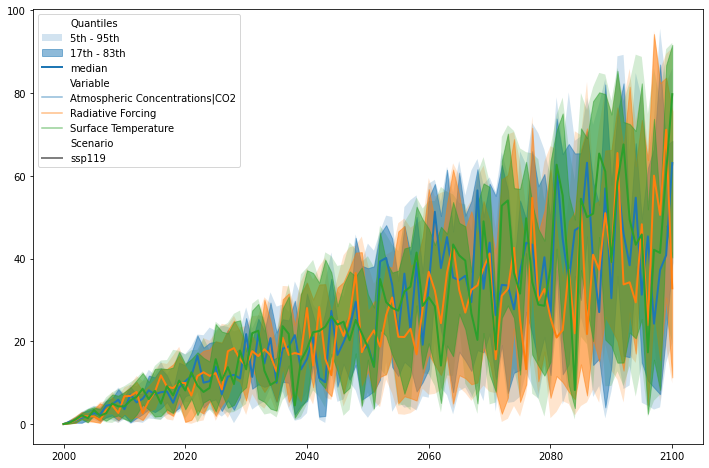

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

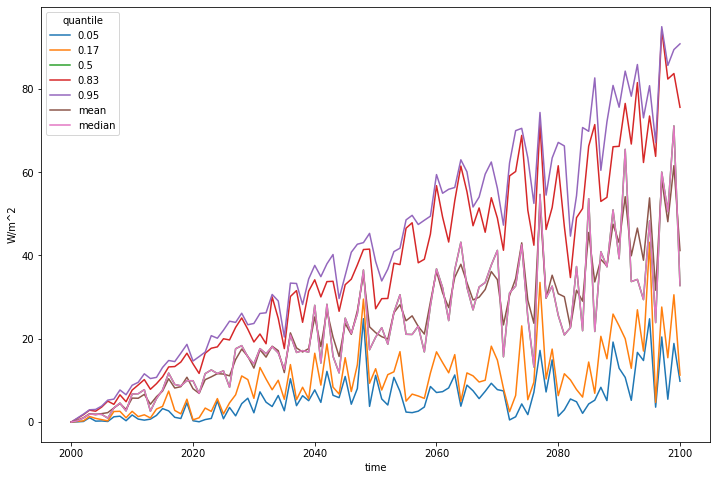

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)